In [1]:
library(anndata)
library(Signac)
library(Seurat)
library(ggplot2)
library(tidyverse)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ readr::read_csv() masks anndata::read_csv()
✖ purrr::reduce()   masks Signac::reduce()


In [2]:
seurat <- readRDS("/Users/dominik.klein/data/seurat_new_annotations.rds")

In [3]:
endocrine_cell_types_red <- c(
    "Eps. progenitors",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [4]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#aec7e8', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#ffbb78', 'Fev+ Delta,1'='#98df8a',
        'Fev+ Delta,2'='#17becf', 'Ngn3 high cycling'='#aec7e8',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [5]:
Idents(seurat) <- seurat@meta.data[["refinement"]]

In [6]:
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types_red)

In [7]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [9]:
LookupGeneCoords(seurat, "Gcg")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]        2 62474530-62483650      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [10]:
LookupGeneCoords(seurat, "Hhex")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 37434810-37440731      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [11]:
LookupGeneCoords(seurat, "Ghrl") 

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]        6 113716119-113719880      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

# Alpha

In [9]:
p <- CoveragePlot(
  object = seurat,
  region = "Gcg",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


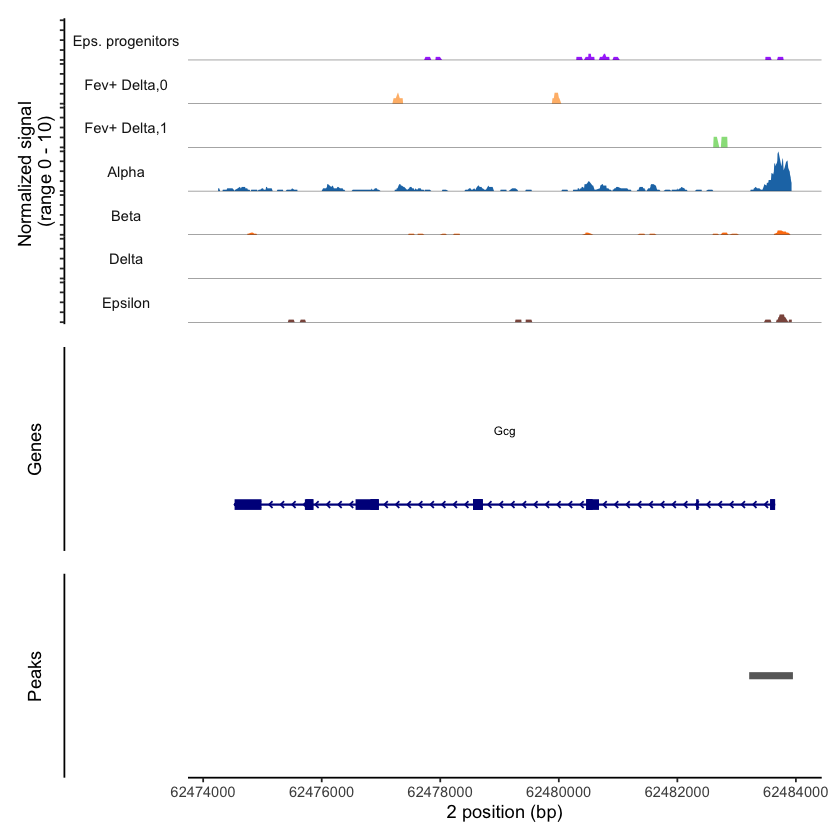

In [10]:
p & scale_fill_manual(values=cols)

# Delta

In [11]:
p <- CoveragePlot(
  object = seurat,
  region = "Sst",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


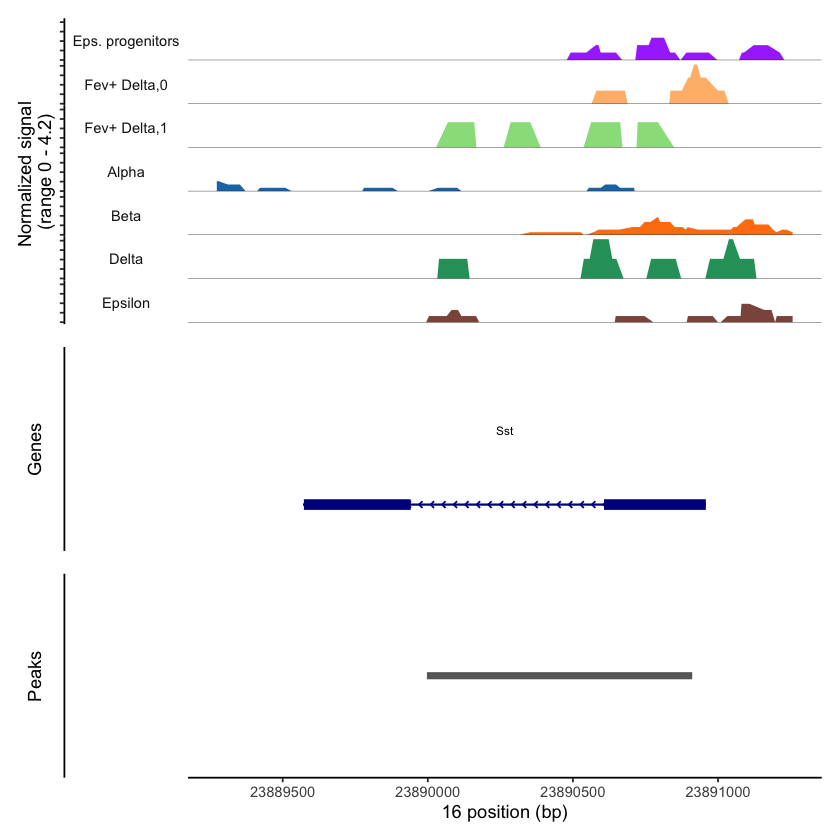

In [12]:
p & scale_fill_manual(values=cols)

In [13]:
p <- CoveragePlot(
  object = seurat,
  region = "Hhex",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 600,
  extend.downstream = 600,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


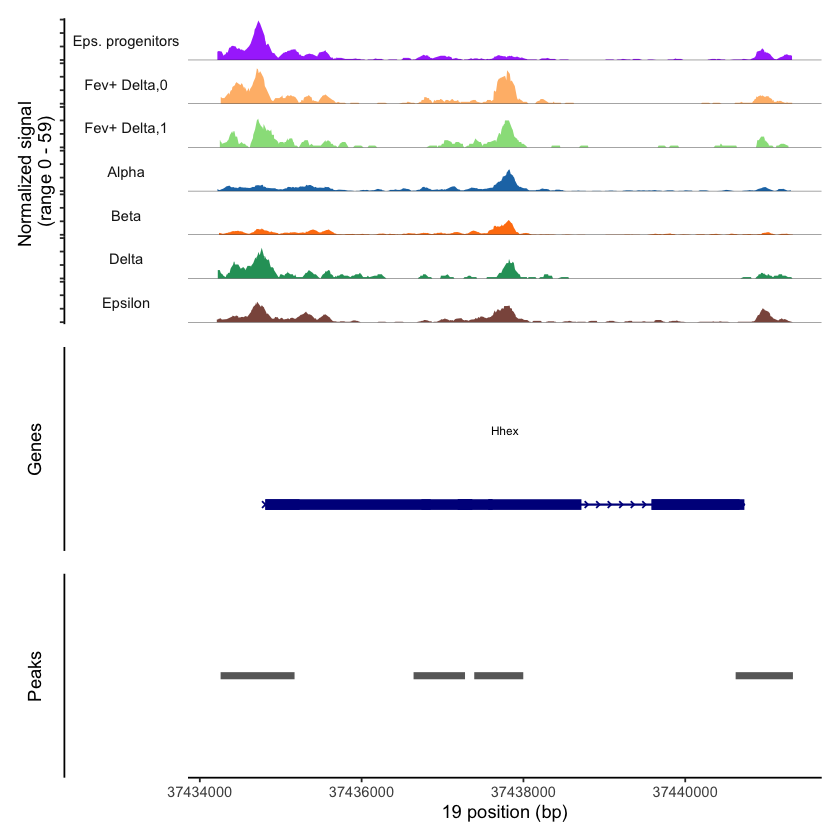

In [14]:
p & scale_fill_manual(values=cols)

# Beta

In [15]:
ins_2_range2 = "7-142678656-142679685"

In [16]:
p <- CoveragePlot(
  object = seurat,
  region = ins_2_range2,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 4 rows containing missing values (`geom_segment()`).”


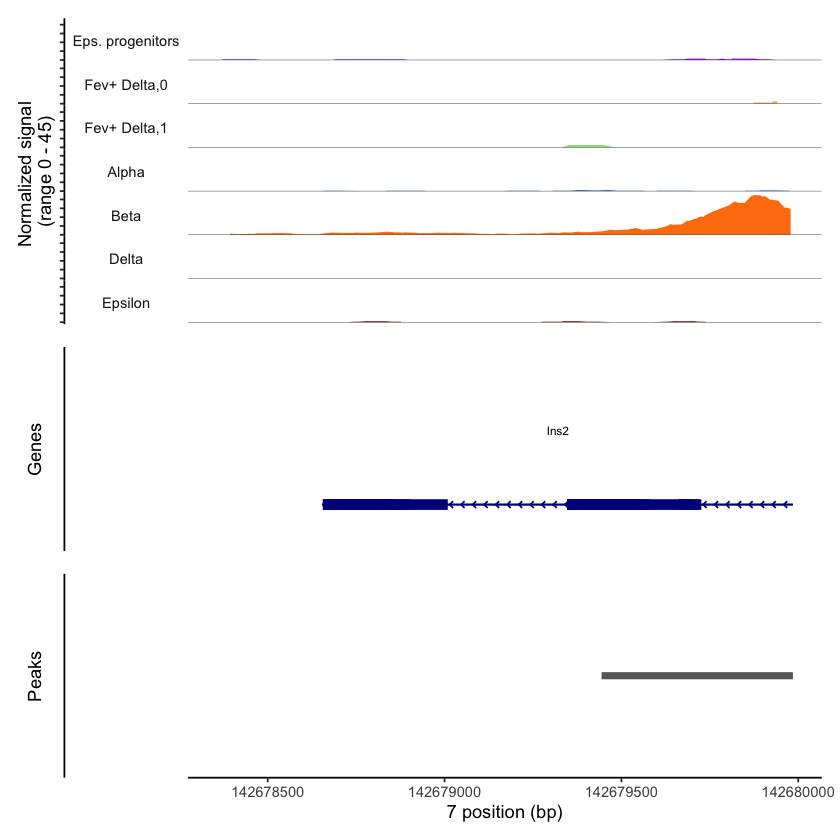

In [17]:
p & scale_fill_manual(values=cols)

In [18]:
p <- CoveragePlot(
  object = seurat,
  region = "7-142743000-142743381",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
  wdith=5,
  height=1.5,
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 25 rows containing missing values (`geom_segment()`).”


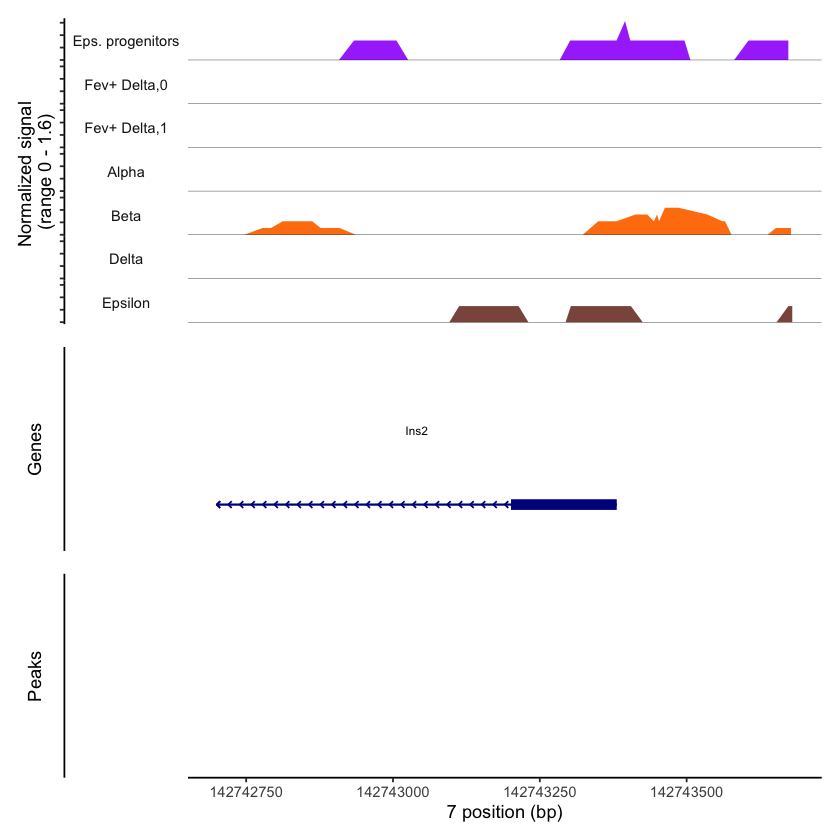

In [19]:
p & scale_fill_manual(values=cols)

# Epsilon 

In [20]:
p <- CoveragePlot(
  object = seurat,
  region ="Ghrl",
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 400,
  extend.downstream = 400,
  wdith=5,
  height=1.5
    
)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


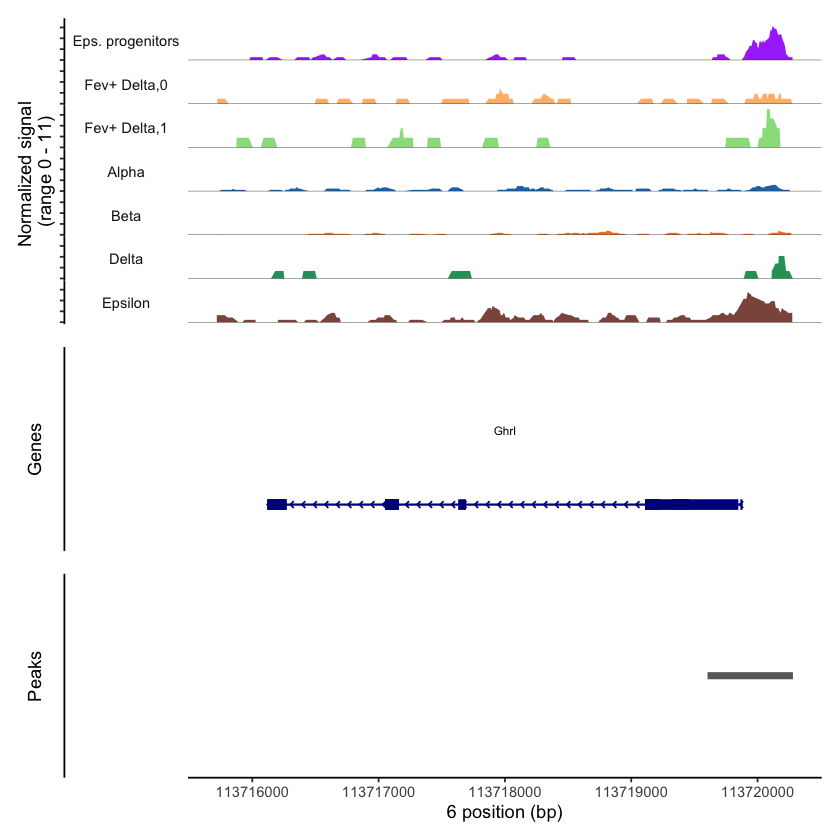

In [ ]:
p & scale_fill_manual(values=cols)

In [ ]:
ggsave(file="ghrelin_atac.png", dpi=300)